# Étape 1: Importer les packages

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Étape 2: Charger les données

In [ ]:
# Dataset pour la régression: Wine Quality (white wine)
wine_data = pd.read_csv('winequality-white.csv', sep=';')

In [28]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Étape 3: Analyse de données

In [29]:
print("Analyse du dataset Wine Quality (Régression):")
print("\nRésumé statistique:")
print(wine_data.describe())
print("\nValeurs manquantes:")
print(wine_data.isnull().sum())

Analyse du dataset Wine Quality (Régression):

Résumé statistique:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.4980

## Visualisation: Histogramme de la variable cible

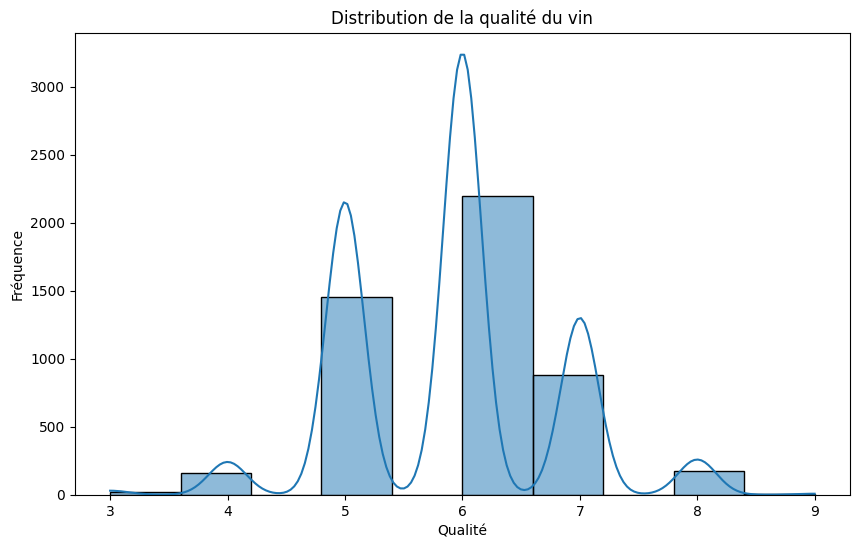

In [33]:
# Visualisation : Histogramme de la variable cible
plt.figure(figsize=(10, 6))
sns.histplot(wine_data['quality'], bins=10, kde=True)
plt.title('Distribution de la qualité du vin')
plt.xlabel('Qualité')
plt.ylabel('Fréquence')
plt.show()


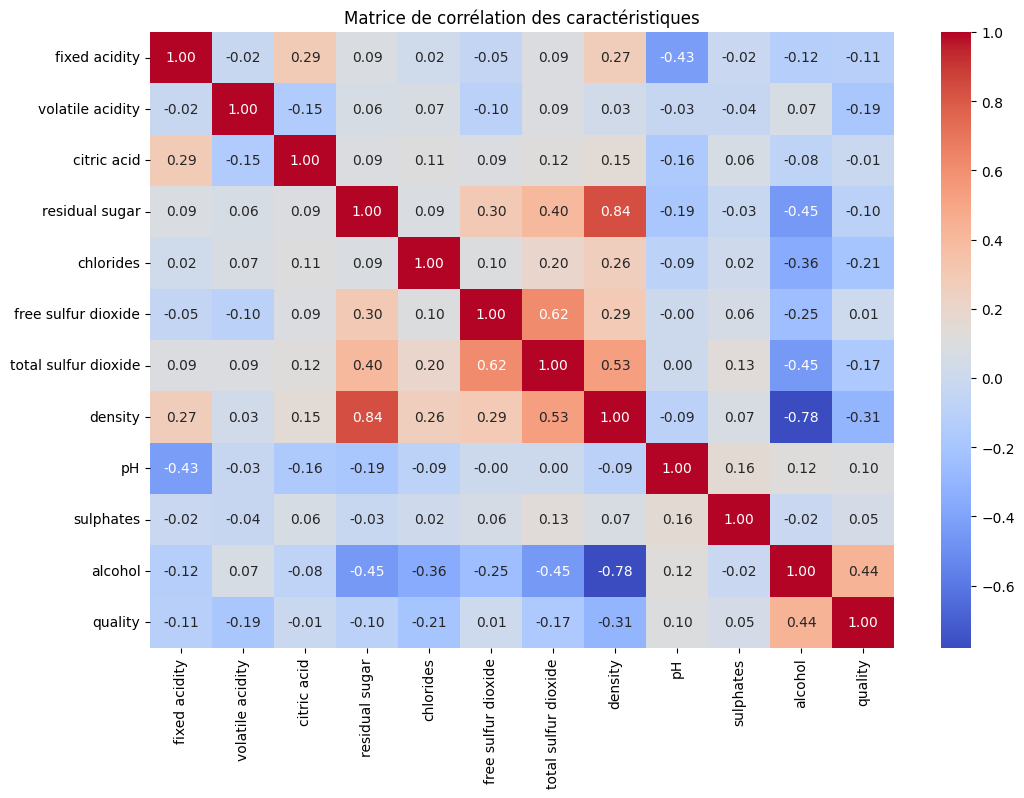

In [34]:
# Visualisation : Heatmap de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation des caractéristiques')
plt.show()


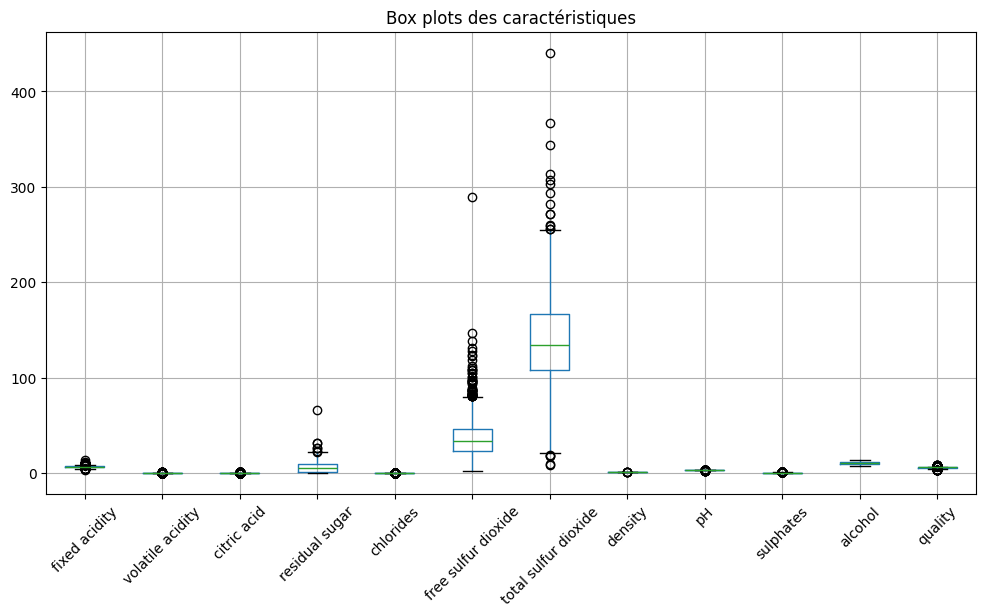

In [35]:
# Visualisation : Box plots pour détecter les outliers
plt.figure(figsize=(12, 6))
wine_data.boxplot()
plt.title('Box plots des caractéristiques')
plt.xticks(rotation=45)
plt.show()


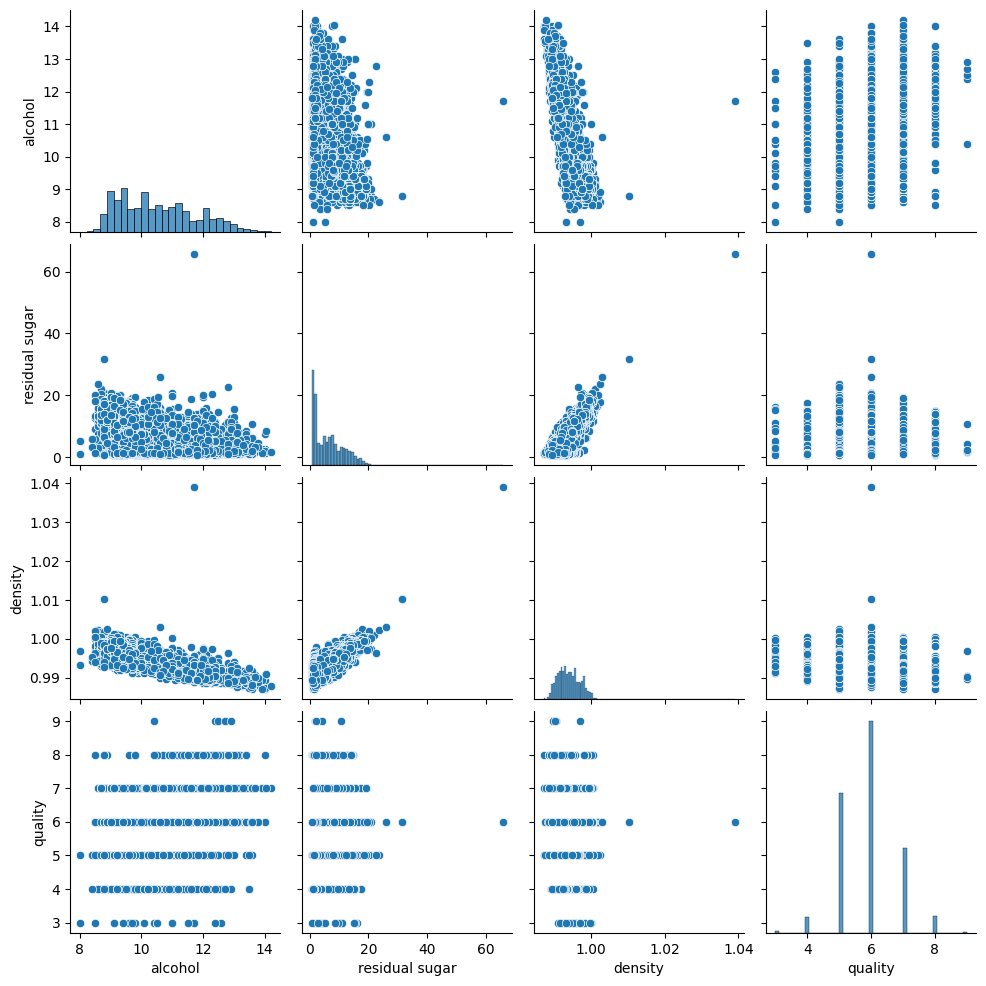

In [36]:
# Visualisation : Pair plot pour les relations entre variables
sns.pairplot(wine_data, vars=['alcohol', 'residual sugar', 'density', 'quality'])
plt.show()


# Étape 4: Prétraitement des données

In [37]:
# Détection et suppression des outliers avec IQR
Q1 = wine_data.quantile(0.25)
Q3 = wine_data.quantile(0.75)
IQR = Q3 - Q1
wine_data_clean = wine_data[~((wine_data < (Q1 - 1.5 * IQR)) | (wine_data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"\nTaille du dataset après suppression des outliers: {wine_data_clean.shape}")


Taille du dataset après suppression des outliers: (3858, 12)


# Étape 5: Diviser les données

In [38]:
# Séparation des caractéristiques et de la cible
X_reg = wine_data_clean.drop('quality', axis=1)
y_reg = wine_data_clean['quality']

In [39]:
# Normalisation
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

In [40]:
# Étape 5: Diviser les données
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)


# Étape 6: Construire les modèles

In [51]:
# Shallow Neural Network
input_dim = X_reg_train.shape[1]
model_reg = Sequential()
model_reg.add(Dense(64, input_shape=(input_dim,), activation='relu'))
model_reg.add(Dropout(0.2))  # Ajout de Dropout pour réduire le surajustement
model_reg.add(Dense(32, activation='relu'))
model_reg.add(Dropout(0.2))
model_reg.add(Dense(1))
model_reg.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
model_reg.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [53]:
# Entraînement
history_reg = model_reg.fit(X_reg_train, y_reg_train, epochs=50, batch_size=32, verbose=1, 
                            validation_data=(X_reg_test, y_reg_test), callbacks=[early_stopping])

Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 17.2496 - mae: 3.7742 - val_loss: 2.0406 - val_mae: 1.1354
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.7642 - mae: 1.3400 - val_loss: 1.6264 - val_mae: 1.0158
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3458 - mae: 1.2439 - val_loss: 1.4279 - val_mae: 0.9592
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0480 - mae: 1.1503 - val_loss: 1.2403 - val_mae: 0.8919
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9740 - mae: 1.1402 - val_loss: 1.0945 - val_mae: 0.8367
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8059 - mae: 1.0855 - val_loss: 0.9666 - val_mae: 0.7871
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.6219 - mae: 1.0175 - val_loss: 0.8937 - val_mae: 0.7609
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4774 - mae: 0.9834 - val_loss: 0.8114 - val_mae: 0.7254
Epoch 9/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4675 - mae

In [54]:
# Algorithmes classiques
reg_algorithms = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'Random Forest Regressor 2': RandomForestRegressor(n_estimators=50, random_state=42),
    'SVR 2': SVR(kernel='linear')
}

In [55]:
# Entraîner les modèles
reg_results = {}
for name, model in reg_algorithms.items():
    model.fit(X_reg_train, y_reg_train)
    y_pred = model.predict(X_reg_test)
    reg_results[name] = {
        'MSE': mean_squared_error(y_reg_test, y_pred),
        'R2': r2_score(y_reg_test, y_pred)
    }


In [56]:
# Neural Network
y_reg_pred_nn = model_reg.predict(X_reg_test)
reg_results['Neural Network'] = {
    'MSE': mean_squared_error(y_reg_test, y_reg_pred_nn),
    'R2': r2_score(y_reg_test, y_reg_pred_nn)
}


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


#  Visualiser l'évolution de l'entraînement

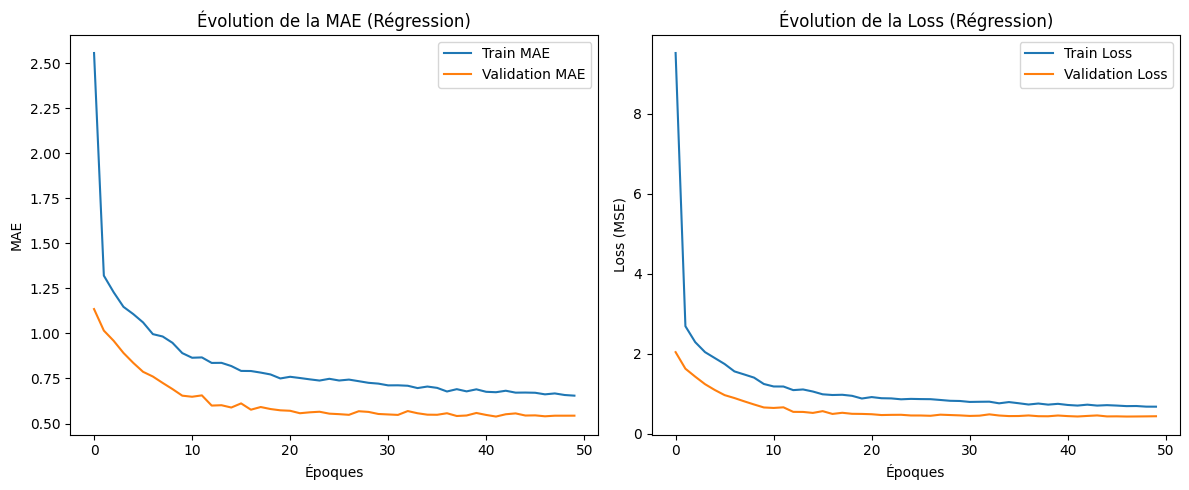

In [58]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_reg.history['mae'], label='Train MAE')
plt.plot(history_reg.history['val_mae'], label='Validation MAE')
plt.title("Évolution de la MAE (Régression)")
plt.xlabel("Époques")
plt.ylabel("MAE")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_reg.history['loss'], label='Train Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.title("Évolution de la Loss (Régression)")
plt.xlabel("Époques")
plt.ylabel("Loss (MSE)")
plt.legend()

plt.tight_layout()
plt.show()

# Étape 8: Évaluer le modèle

In [59]:
print("\nMétriques pour la régression:")
for name, metrics in reg_results.items():
    print(f"{name}: MSE = {metrics['MSE']:.4f}, R2 = {metrics['R2']:.4f}")


Métriques pour la régression:
Linear Regression: MSE = 0.4699, R2 = 0.2332
Random Forest Regressor: MSE = 0.3212, R2 = 0.4758
SVR: MSE = 0.3889, R2 = 0.3654
Random Forest Regressor 2: MSE = 0.3249, R2 = 0.4698
SVR 2: MSE = 0.4767, R2 = 0.2220
Neural Network: MSE = 0.4313, R2 = 0.2960


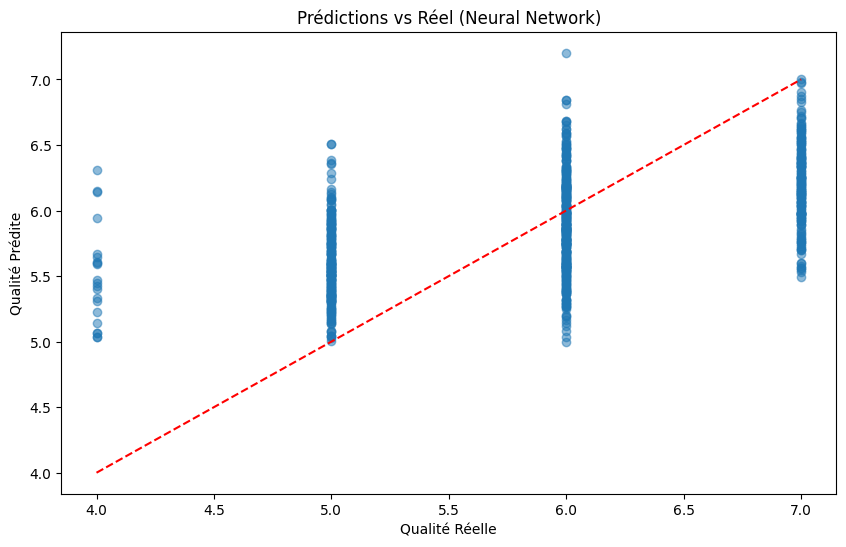

In [60]:
# Visualisation : Prédictions vs Réel
plt.figure(figsize=(10, 6))
plt.scatter(y_reg_test, y_reg_pred_nn, alpha=0.5)
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--')
plt.title('Prédictions vs Réel (Neural Network)')
plt.xlabel('Qualité Réelle')
plt.ylabel('Qualité Prédite')
plt.show()


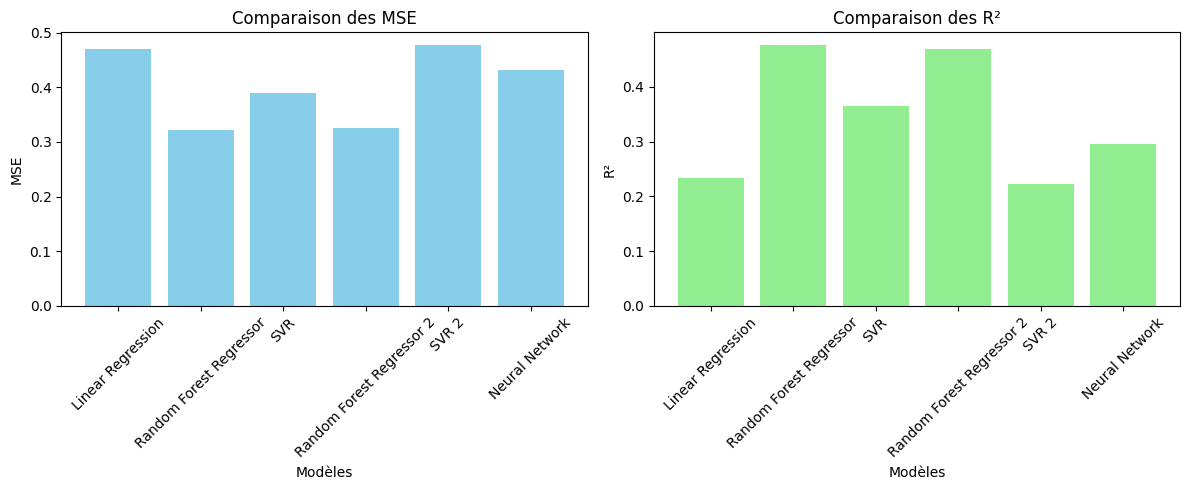

In [61]:
# Visualisation : Comparaison des métriques
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
models = list(reg_results.keys())
mse_values = [reg_results[model]['MSE'] for model in models]
plt.bar(models, mse_values, color='skyblue')
plt.title('Comparaison des MSE')
plt.xlabel('Modèles')
plt.ylabel('MSE')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
r2_values = [reg_results[model]['R2'] for model in models]
plt.bar(models, r2_values, color='lightgreen')
plt.title('Comparaison des R²')
plt.xlabel('Modèles')
plt.ylabel('R²')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()